# Satellite imagery analysis

In [1]:
from python_scripts.connector import *
from python_scripts.helper import *

Succefully connected!


In [2]:
from eval_scripts.evalscript_ndvi_values  import *
from eval_scripts.evalscript_true_color import *

In [3]:
coords = [86.773796,21.848934,87.231445,22.063497]
no_clouds = { 
    "dataFilter": { 
        "maxCloudCoverage": 10
    } 
}

In [4]:
labels = simple_request(evalscript_ndvi_values, coords, config, False, other_args=no_clouds)

In [5]:
labels

array([[0.45138177, 0.34991223, 0.48130658, ..., 0.6659681 , 0.6936    ,
        0.6870307 ],
       [0.43951485, 0.3415    , 0.33541784, ..., 0.654518  , 0.6892    ,
        0.6863691 ],
       [0.5574974 , 0.2890318 , 0.32288   , ..., 0.65802675, 0.6753991 ,
        0.6907134 ],
       ...,
       [0.52655536, 0.5565666 , 0.6254218 , ..., 0.65666044, 0.6739403 ,
        0.3612079 ],
       [0.5669925 , 0.6109799 , 0.5991856 , ..., 0.5914793 , 0.51500714,
        0.41086262],
       [0.5614709 , 0.5527023 , 0.575     , ..., 0.43168017, 0.5113065 ,
        0.41830772]], dtype=float32)

In [6]:
# Preprocessing 
import numpy as np

In [7]:
min_ndvi = 0.6

def map_ndvi_label(ndvi):
    """
    Categorizing range of ndvi values to a label.
    We have two categories: 
    1. trees - 1
    2. not trees - 0
    We categorize evey ndvi values that is higher than our threshold(0.6) to be trees (1).
    Everything that is equal or less than our threshold (0.6) we be 'not trees' (0): 
    """
    ndvi_copy = ndvi.copy()

    vegetation = np.where(ndvi_copy > min_ndvi, 1, 0)
     
    return vegetation


In [8]:
ndvi_labels= map_ndvi_label(labels) # labels/ targets

In [9]:
ndvi_labels

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# get our features satellite imagery
from eval_scripts.evalscript_ndvi import *

In [11]:
img_true_color = simple_request(evalscript_true_color, coords, config, False, other_args=no_clouds)

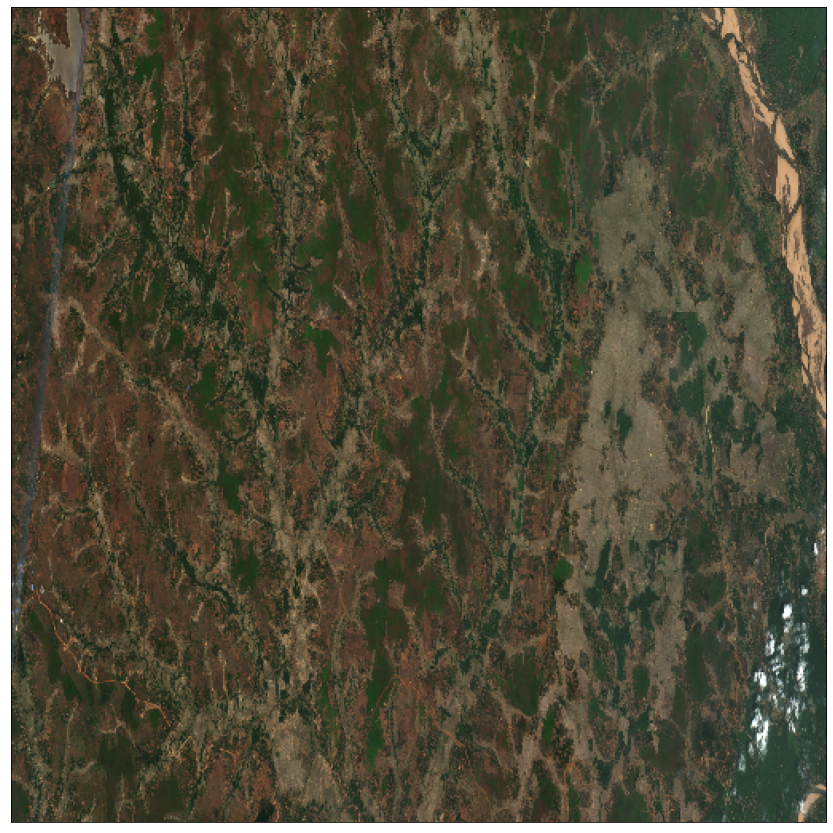

In [12]:
plot_image(img_true_color)

In [13]:
img_ndvi = simple_request(evalscript_ndvi, coords, config, False, other_args=no_clouds)

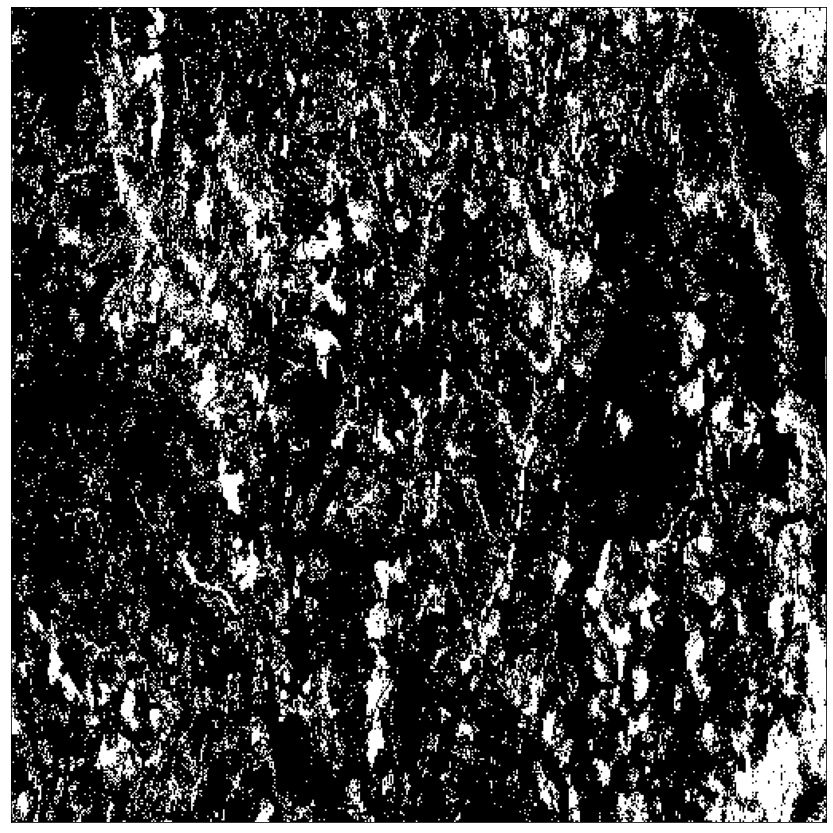

In [14]:
plot_image(img_ndvi)

In [15]:
img_ndvi.shape

(512, 512, 3)

## Determening range for forested area

we need to determine wat  ndvi range is suited in order to detect forestry in our desired areas of west bengal.furthermore we would like to check ndvi correlates with our true color.

The first thing we need to do is get the dvi values of an area that has a high level of  vegetation. We chose Mizoram, because Mizoram ha 90% are under forest,thus this area woud be suitale to determine a ood ndvi range for forestry .

In [16]:
coords_mizoram = [92.904910,23.074137,93.015818,23.175780]

In [17]:
mizoram_true_color = simple_request(evalscript_true_color, coords_mizoram, config, False, other_args=no_clouds)

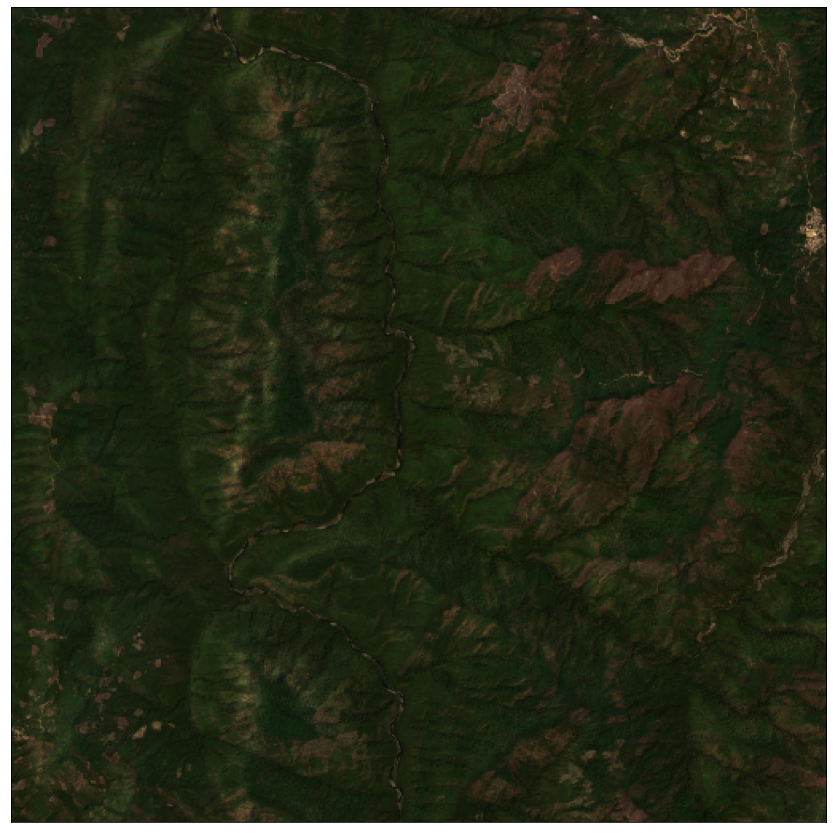

In [18]:
plot_image(mizoram_true_color)

In [19]:
mizoram_ndvi = simple_request(evalscript_ndvi_values, coords_mizoram, config, False, other_args=no_clouds)

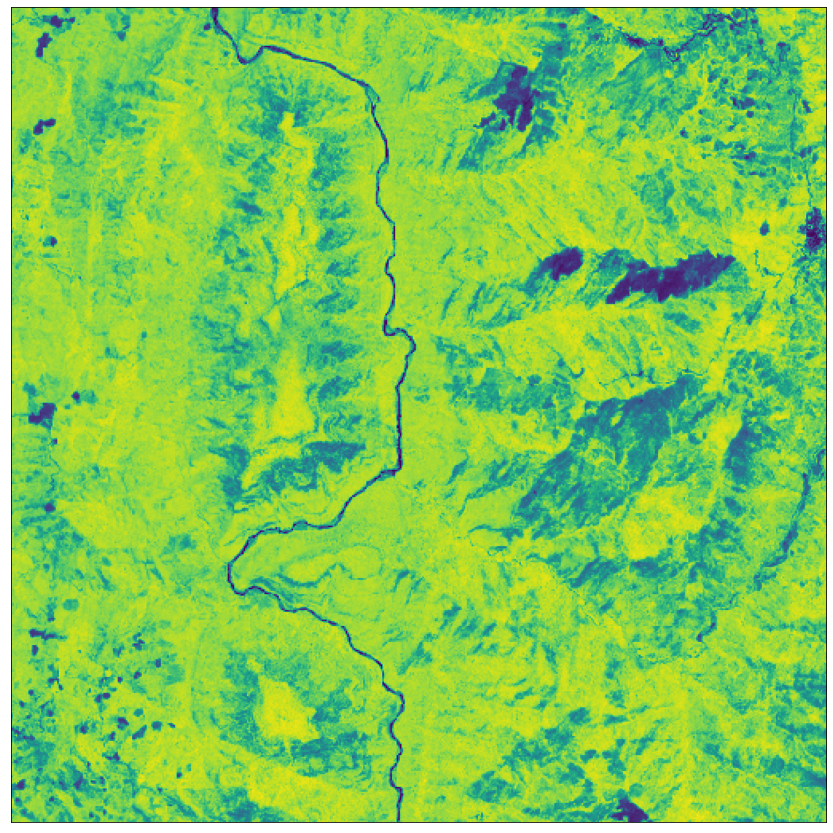

In [20]:
plot_image(mizoram_ndvi)

In [21]:
mizoram_ndvi.shape

(512, 512)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  7.,   3.,   1.,   4.,  22.,  35.,  53., 103., 161., 123.]),
 array([0.08015769, 0.15855497, 0.23695225, 0.31534952, 0.3937468 ,
        0.47214407, 0.55054134, 0.6289386 , 0.7073359 , 0.78573316,
        0.86413044], dtype=float32),
 <BarContainer object of 10 artists>)

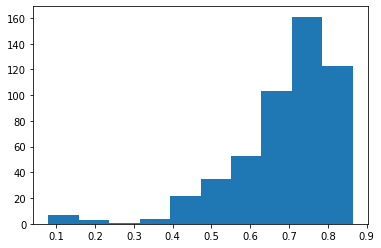

In [23]:
plt.hist(mizoram_ndvi[511]) #TODO find a way to look at the  ndvi distibution of the complete image

(array([  1.,   1.,   3.,  19.,  87., 132., 133., 102.,  27.,   7.]),
 array([-0.29764453, -0.1750487 , -0.05245286,  0.07014297,  0.1927388 ,
         0.31533462,  0.43793046,  0.5605263 ,  0.68312216,  0.80571795,
         0.9283138 ], dtype=float32),
 <BarContainer object of 10 artists>)

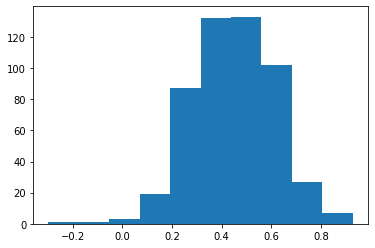

In [24]:
#get the distribution of our area in west bengal
plt.hist(labels[511])